In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('preci_all.csv')
df.columns = ['Date','ddate','value','geo']
df['Date'] = df['Date'].astype(str).str[:-2].astype(str)
df['Date'].iloc[43]
df.columns

Index(['Date', 'ddate', 'value', 'geo'], dtype='object')

In [3]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d%H%M')
del df['ddate'],df['geo']
df

,Date,value
0,2000-06-01 00:00:00,0.0
1,2000-06-01 00:30:00,0.0
2,2000-06-01 01:00:00,0.0
3,2000-06-01 01:30:00,0.0
4,2000-06-01 02:00:00,0.0
...,...,...
355008,2020-08-31 08:00:00,0.0
355009,2020-08-31 08:30:00,0.0
355010,2020-08-31 09:00:00,0.0
355011,2020-08-31 09:30:00,0.0


In [4]:
df18 = df[df['Date'].dt.year == 2018]  
df18 = df18[df18['Date'].dt.month == 7]
df18 = df18.reset_index()
df18.columns

Index(['index', 'Date', 'value'], dtype='object')

<AxesSubplot:ylabel='Frequency'>

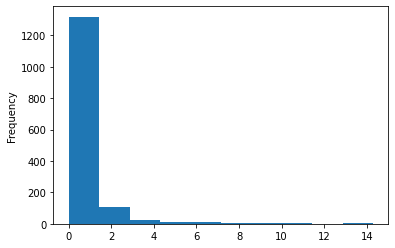

In [5]:
X = df18.value
X.plot.hist()

In [7]:
fig = px.line(df18,'Date','value')
fig.show()

In [78]:

X = X.to_numpy()
X=X.reshape(-1,1)
X

array([[1.02746583e-04],
       [1.17965781e-04],
       [2.29993930e-04],
       ...,
       [5.09481687e-04],
       [1.62206633e-04],
       [5.59423593e-05]])

In [79]:
from sklearn import mixture

In [80]:
gmm = mixture.GaussianMixture(n_components=5).fit(X)
labels = gmm.predict(X)
#plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [81]:
unique_elements, counts_elements = np.unique(labels, return_counts=True)


In [82]:
counts_elements

array([431, 231, 382, 383,  61])

In [83]:
unique_elements

array([0, 1, 2, 3, 4])

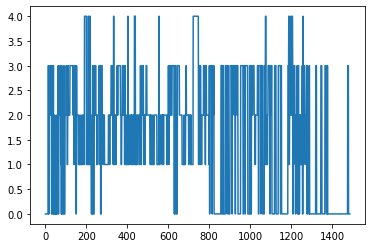

In [84]:
plt.plot(labels)

In [85]:
labels

array([0, 0, 0, ..., 0, 0, 0])

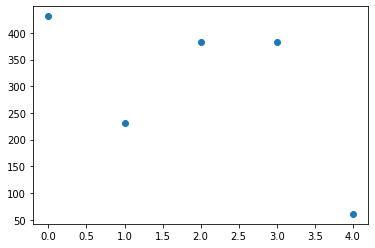

In [86]:
plt.scatter(unique_elements, counts_elements)
plt.show()

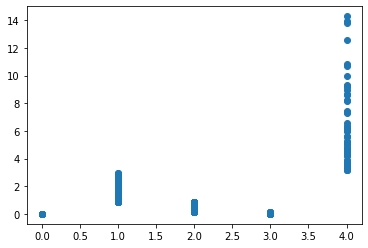

In [87]:
plt.scatter(labels,X)

In [88]:
counts_elements

array([431, 231, 382, 383,  61])

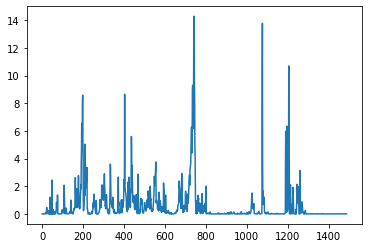

In [89]:
plt.plot(X)

AttributeError: 'numpy.ndarray' object has no attribute 'plot'